In [3]:
# Importation of libraries
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn as skl
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, IsolationForest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import gradio as gr
import joblib

In [4]:
df = pd.read_csv("./Dataset/Train_Test_IoT_Fridge.csv")  # Change the delimiter as per your file structure
#print(df.head(1))

In [5]:
df1 = pd.read_csv("./Dataset/Train_Test_IoT_Garage_Door.csv")  # Change the delimiter as per your file structure
#print(df.head(1))

In [6]:
df2 = pd.read_csv("./Dataset/Train_Test_IoT_GPS_Tracker.csv")  # Change the delimiter as per your file structure
#print(df.head(1))

In [7]:
df3 = pd.read_csv("./Dataset/Train_Test_IoT_Modbus.csv")  # Change the delimiter as per your file structure
#print(df.head(1))

In [8]:
df4 = pd.read_csv("./Dataset/Train_Test_IoT_Motion_Light.csv")  # Change the delimiter as per your file structure
#print(df.head(1))

In [9]:
df5 = pd.read_csv("./Dataset/Train_Test_IoT_Thermostat.csv")  # Change the delimiter as per your file structure
#print(df.head(1))

In [10]:
df6 = pd.read_csv("./Dataset/Train_Test_IoT_Weather.csv")  # Change the delimiter as per your file structure
#print(df.head(1))

In [11]:
df

,date,time,fridge_temperature,temp_condition,label,type
0,25-Apr-19,19:19:40,9.00,high,1,ddos
1,25-Apr-19,19:19:40,9.25,high,1,ddos
2,25-Apr-19,19:19:45,12.65,high,1,ddos
3,25-Apr-19,19:19:45,4.65,low,1,ddos
4,25-Apr-19,19:19:55,12.65,high,1,ddos
...,...,...,...,...,...,...
39939,27-Apr-19,05:13:35,13.25,high,1,xss
39940,27-Apr-19,05:13:36,4.35,low,1,xss
39941,27-Apr-19,05:13:36,1.00,low,1,xss
39942,27-Apr-19,05:13:36,10.25,high,1,xss


In [12]:
df1

,date,time,door_state,sphone_signal,label,type
0,25-Apr-19,14:42:33,closed,0,1,ddos
1,25-Apr-19,14:42:38,closed,0,1,ddos
2,25-Apr-19,14:42:43,closed,0,1,ddos
3,25-Apr-19,14:42:48,closed,0,1,ddos
4,25-Apr-19,14:42:58,closed,0,1,ddos
...,...,...,...,...,...,...
39582,28-Apr-19,05:15:19,closed,0,1,ransomware
39583,28-Apr-19,05:15:20,closed,0,1,ransomware
39584,28-Apr-19,05:15:21,closed,0,1,ransomware
39585,28-Apr-19,05:15:21,closed,0,1,ransomware


In [13]:
df2

,date,time,latitude,longitude,label,type
0,25-Apr-19,18:31:39,116.521704,132.162504,1,ddos
1,25-Apr-19,18:31:41,121.742933,135.072500,1,ddos
2,25-Apr-19,18:31:46,121.795929,135.110198,1,ddos
3,25-Apr-19,18:31:49,116.611216,132.224555,1,ddos
4,25-Apr-19,18:31:51,121.841526,135.151362,1,ddos
...,...,...,...,...,...,...
38955,27-Apr-19,05:40:37,22.730688,33.292440,1,xss
38956,27-Apr-19,05:40:42,22.831138,33.313834,1,xss
38957,27-Apr-19,05:40:43,23.663503,32.753224,1,xss
38958,27-Apr-19,05:40:48,23.671383,32.758392,1,xss


In [14]:
df3

,date,time,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,type
0,25-Apr-19,09:14:00,49389,52921,25770,13625,1,injection
1,25-Apr-19,09:14:00,49389,52921,25770,13625,1,injection
2,25-Apr-19,09:14:01,49389,52921,25770,13625,1,injection
3,25-Apr-19,09:14:02,49389,52921,25770,13625,1,injection
4,25-Apr-19,09:14:04,40665,44748,21098,35371,1,injection
...,...,...,...,...,...,...,...,...
31101,27-Apr-19,04:59:55,770,25749,21920,3840,1,xss
31102,27-Apr-19,05:00:00,44279,5650,45891,7003,1,xss
31103,27-Apr-19,05:00:01,44279,5650,45891,7003,1,xss
31104,27-Apr-19,05:00:10,42634,47813,36239,60790,1,xss


In [15]:
df4

,date,time,motion_status,light_status,label,type
0,25-Apr-19,19:41:37,0,off,1,ddos
1,25-Apr-19,19:41:42,1,on,1,ddos
2,25-Apr-19,19:41:43,0,off,1,ddos
3,25-Apr-19,19:41:48,1,on,1,ddos
4,25-Apr-19,19:41:48,0,off,1,ddos
...,...,...,...,...,...,...
39483,27-Apr-19,05:40:25,1,on,1,xss
39484,27-Apr-19,05:40:30,0,off,1,xss
39485,27-Apr-19,05:40:40,1,on,1,xss
39486,27-Apr-19,05:40:43,0,off,1,xss


In [16]:
df5 

,date,time,current_temperature,thermostat_status,label,type
0,25-Apr-19,8:59:02,30.577325,1,1,injection
1,25-Apr-19,8:59:06,29.187912,1,1,injection
2,25-Apr-19,8:59:06,30.208893,1,1,injection
3,25-Apr-19,8:59:06,27.731392,1,1,injection
4,25-Apr-19,8:59:06,26.211462,1,1,injection
...,...,...,...,...,...,...
32769,27-Apr-19,05:40:25,25.000000,0,1,xss
32770,27-Apr-19,05:40:30,26.011628,1,1,xss
32771,27-Apr-19,05:40:40,30.093672,1,1,xss
32772,27-Apr-19,05:40:43,25.000000,0,1,xss


In [17]:
df6

,date,time,temperature,pressure,humidity,label,type
0,25-Apr-19,17:33:16,40.881866,-0.101806,38.363631,1,ddos
1,25-Apr-19,17:33:16,44.913806,2.661616,46.141423,1,ddos
2,25-Apr-19,17:33:16,38.295822,-2.438871,50.850643,1,ddos
3,25-Apr-19,17:33:21,41.306586,-0.101806,38.363631,1,ddos
4,25-Apr-19,17:33:21,44.903178,3.080849,46.141423,1,ddos
...,...,...,...,...,...,...,...
39255,27-Apr-19,05:40:42,43.138727,-0.421404,40.661168,1,xss
39256,27-Apr-19,05:40:42,23.140147,-2.399335,68.605010,1,xss
39257,27-Apr-19,05:40:52,28.393034,4.526178,71.446893,1,xss
39258,27-Apr-19,05:40:52,43.826907,-0.421404,40.661168,1,xss


In [18]:
df.isnull().sum()

date                  0
time                  0
fridge_temperature    0
temp_condition        0
label                 0
type                  0
dtype: int64

In [19]:
df1.isnull().sum()

date             0
time             0
door_state       0
sphone_signal    0
label            0
type             0
dtype: int64

In [20]:
df2.isnull().sum()

date         0
time         0
latitude     0
longitude    0
label        0
type         0
dtype: int64

In [21]:
df3.isnull().sum()

date                         0
time                         0
FC1_Read_Input_Register      0
FC2_Read_Discrete_Value      0
FC3_Read_Holding_Register    0
FC4_Read_Coil                0
label                        0
type                         0
dtype: int64

In [22]:
df4.isnull().sum()

date             0
time             0
motion_status    0
light_status     0
label            0
type             0
dtype: int64

In [23]:
df5.isnull().sum()

date                   0
time                   0
current_temperature    0
thermostat_status      0
label                  0
type                   0
dtype: int64

In [24]:
df6.isnull().sum()

date           0
time           0
temperature    0
pressure       0
humidity       0
label          0
type           0
dtype: int64

In [25]:
df['type'].unique()

array(['ddos', 'backdoor', 'injection', 'normal', 'password',
       'ransomware', 'xss'], dtype=object)

In [26]:
df1['type'].unique()

array(['ddos', 'backdoor', 'injection', 'normal', 'password',
       'ransomware', 'xss', 'scanning'], dtype=object)

In [27]:
df2['type'].unique()

array(['ddos', 'backdoor', 'injection', 'normal', 'password',
       'ransomware', 'scanning', 'xss'], dtype=object)

In [28]:
df3['type'].unique()

array(['injection', 'backdoor', 'normal', 'password', 'scanning', 'xss'],
      dtype=object)

In [29]:
df4['type'].unique()

array(['ddos', 'backdoor', 'injection', 'normal', 'password',
       'ransomware', 'scanning', 'xss'], dtype=object)

In [30]:
df5['type'].unique()

array(['injection', 'backdoor', 'normal', 'password', 'ransomware',
       'scanning', 'xss'], dtype=object)

In [31]:
df6['type'].unique()

array(['ddos', 'backdoor', 'injection', 'normal', 'password',
       'ransomware', 'scanning', 'xss'], dtype=object)

In [32]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique(), "\n")

Column: date
['25-Apr-19' '28-Apr-19' '29-Apr-19' '31-Mar-19' '1-Apr-19' '2-Apr-19'
 '26-Apr-19' '27-Apr-19'] 

Column: time
[' 19:19:40 ' ' 19:19:45 ' ' 19:19:55 ' ... ' 05:12:56 ' ' 05:13:00 '
 ' 05:13:01 '] 

Column: fridge_temperature
[ 9.    9.25 12.65  4.65 10.85 11.55 13.4   1.75 11.85  1.   11.4   3.
 10.25  9.1   6.95 13.85  8.85  9.65  5.   10.55  9.55 12.95  5.25 11.25
  7.85 10.8   5.6   7.8  12.7   6.25 10.65  5.1   6.85 12.5   7.55  4.15
  7.95  4.3  13.1   5.95  5.35  4.95  9.7  12.85  8.    3.2  10.7   7.4
  8.95 10.4   6.1  10.    2.2   2.    2.35 10.1   8.25  5.75  5.9   5.2
  9.85 11.1   9.95  6.4   6.05  5.8   5.55 12.    3.05  6.35  8.7   3.9
  8.5   5.65  2.15  9.8   7.1   6.55  8.4  13.55  5.7   6.8  11.8   6.7
  8.8  11.95  5.45 10.95  4.35 12.4   1.45 12.55 13.25  6.65  5.85 11.5
  5.05  3.45  2.6   9.5   8.1   4.    5.5  11.65  4.6  13.7   4.9  12.25
 12.1   5.4   7.65  8.65  3.6   4.75  4.8   9.4  12.8   2.3   7.5   4.5
  3.3   7.25  2.05 14.    2.45  8.55  2

In [33]:
for col in df1.columns:
    print(f"Column: {col}")
    print(df1[col].unique(), "\n")

Column: date
['25-Apr-19' '28-Apr-19' '1-Apr-19' '2-Apr-19' '31-Mar-19' '26-Apr-19'
 '27-Apr-19' '23-Apr-19'] 

Column: time
[' 14:42:33 ' ' 14:42:38 ' ' 14:42:43 ' ... ' 05:15:19 ' ' 05:15:20 '
 ' 05:15:24 '] 

Column: door_state
['closed' 'open'] 

Column: sphone_signal
['0' '1' 'true  ' 'false  '] 

Column: label
[1 0] 

Column: type
['ddos' 'backdoor' 'injection' 'normal' 'password' 'ransomware' 'xss'
 'scanning'] 



In [34]:
for col in df2.columns:
    print(f"Column: {col}")
    print(df2[col].unique(), "\n")

Column: date
['25-Apr-19' '28-Apr-19' '31-Mar-19' '26-Apr-19' '1-Apr-19' '23-Apr-19'
 '27-Apr-19'] 

Column: time
[' 18:31:39 ' ' 18:31:41 ' ' 18:31:46 ' ... ' 05:40:43 ' ' 05:40:48 '
 ' 05:40:52 '] 

Column: latitude
[116.5217044  121.7429329  121.7959286  ...  23.66350316  23.67138306
  22.89502365] 

Column: longitude
[132.1625042  135.0725     135.1101981  ...  32.75322351  32.75839153
  33.37835499] 

Column: label
[1 0] 

Column: type
['ddos' 'backdoor' 'injection' 'normal' 'password' 'ransomware' 'scanning'
 'xss'] 



In [35]:
for col in df3.columns:
    print(f"Column: {col}")
    print(df3[col].unique(), "\n")

Column: date
['25-Apr-19' '28-Apr-19' '31-Mar-19' '26-Apr-19' '23-Apr-19' '27-Apr-19'] 

Column: time
[' 09:14:00 ' ' 09:14:01 ' ' 09:14:02 ' ... ' 05:00:01 ' ' 05:00:10 '
 ' 05:00:16 '] 

Column: FC1_Read_Input_Register
[49389 40665 57147 ... 44279 42634  7094] 

Column: FC2_Read_Discrete_Value
[52921 44748 19212 ...  5650 47813 18095] 

Column: FC3_Read_Holding_Register
[25770 21098 15924 ... 45891 36239 49043] 

Column: FC4_Read_Coil
[13625 35371 39734 ...  7003 60790 37280] 

Column: label
[1 0] 

Column: type
['injection' 'backdoor' 'normal' 'password' 'scanning' 'xss'] 



In [36]:
for col in df4.columns:
    print(f"Column: {col}")
    print(df4[col].unique(), "\n")

Column: date
['25-Apr-19' '28-Apr-19' '31-Mar-19' '1-Apr-19' '26-Apr-19' '2-Apr-19'
 '27-Apr-19'] 

Column: time
[' 19:41:37 ' ' 19:41:42 ' ' 19:41:43 ' ... ' 05:40:40 ' ' 05:40:43 '
 ' 05:40:48 '] 

Column: motion_status
[0 1] 

Column: light_status
[' off' ' on'] 

Column: label
[1 0] 

Column: type
['ddos' 'backdoor' 'injection' 'normal' 'password' 'ransomware' 'scanning'
 'xss'] 



In [37]:
for col in df5.columns:
    print(f"Column: {col}")
    print(df5[col].unique(), "\n")

Column: date
['25-Apr-19' '28-Apr-19' '31-Mar-19' '1-Apr-19' '2-Apr-19' '26-Apr-19'
 '23-Apr-19' '27-Apr-19'] 

Column: time
['8:59:02' '8:59:06' '8:59:07' ... ' 05:40:40 ' ' 05:40:43 ' ' 05:40:48 '] 

Column: current_temperature
[30.57732541 29.18791215 30.20889259 ... 26.01162765 30.09367188
 29.85261281] 

Column: thermostat_status
[1 0] 

Column: label
[1 0] 

Column: type
['injection' 'backdoor' 'normal' 'password' 'ransomware' 'scanning' 'xss'] 



In [38]:
for col in df6.columns:
    print(f"Column: {col}")
    print(df6[col].unique(), "\n")

Column: date
['25-Apr-19' '28-Apr-19' '31-Mar-19' '26-Apr-19' '23-Apr-19' '27-Apr-19'] 

Column: time
['17:33:16' '17:33:21' '17:33:31' ... ' 05:40:37 ' ' 05:40:42 '
 ' 05:40:52 '] 

Column: temperature
[40.88186638 44.91380636 38.29582187 ... 28.3930344  43.82690673
 22.40992517] 

Column: pressure
[-0.10180587  2.66161551 -2.43887108 ... -2.12140003 -2.39933537
  4.52617807] 

Column: humidity
[38.3636313  46.14142334 50.85064264 ... 68.60500977 71.4468934
 40.66116758] 

Column: label
[1 0] 

Column: type
['ddos' 'backdoor' 'injection' 'normal' 'password' 'ransomware' 'scanning'
 'xss'] 



In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39944 entries, 0 to 39943
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                39944 non-null  object 
 1   time                39944 non-null  object 
 2   fridge_temperature  39944 non-null  float64
 3   temp_condition      39944 non-null  object 
 4   label               39944 non-null  int64  
 5   type                39944 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.8+ MB


In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39587 entries, 0 to 39586
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           39587 non-null  object
 1   time           39587 non-null  object
 2   door_state     39587 non-null  object
 3   sphone_signal  39587 non-null  object
 4   label          39587 non-null  int64 
 5   type           39587 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.8+ MB


In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38960 entries, 0 to 38959
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       38960 non-null  object 
 1   time       38960 non-null  object 
 2   latitude   38960 non-null  float64
 3   longitude  38960 non-null  float64
 4   label      38960 non-null  int64  
 5   type       38960 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.8+ MB


In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31106 entries, 0 to 31105
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   date                       31106 non-null  object
 1   time                       31106 non-null  object
 2   FC1_Read_Input_Register    31106 non-null  int64 
 3   FC2_Read_Discrete_Value    31106 non-null  int64 
 4   FC3_Read_Holding_Register  31106 non-null  int64 
 5   FC4_Read_Coil              31106 non-null  int64 
 6   label                      31106 non-null  int64 
 7   type                       31106 non-null  object
dtypes: int64(5), object(3)
memory usage: 1.9+ MB


In [43]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39488 entries, 0 to 39487
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           39488 non-null  object
 1   time           39488 non-null  object
 2   motion_status  39488 non-null  int64 
 3   light_status   39488 non-null  object
 4   label          39488 non-null  int64 
 5   type           39488 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.8+ MB


In [44]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32774 entries, 0 to 32773
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 32774 non-null  object 
 1   time                 32774 non-null  object 
 2   current_temperature  32774 non-null  float64
 3   thermostat_status    32774 non-null  int64  
 4   label                32774 non-null  int64  
 5   type                 32774 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.5+ MB


In [87]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39260 entries, 0 to 39259
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         39260 non-null  object 
 1   time         39260 non-null  object 
 2   temperature  39260 non-null  float64
 3   pressure     39260 non-null  float64
 4   humidity     39260 non-null  float64
 5   label        39260 non-null  int64  
 6   type         39260 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.1+ MB


In [88]:
oe = OrdinalEncoder()    
    # Columns to encode (categorical columns)
columns_to_encode = [
    "date", "time", "temp_condition", "type"
]

# Encode and replace the original columns with encoded values
df[columns_to_encode] = oe.fit_transform(df[columns_to_encode])

In [89]:
oe = OrdinalEncoder()    
    # Columns to encode (categorical columns)
columns_to_encode = [
    "date", "time", "door_state", "sphone_signal", "type"
]

# Encode and replace the original columns with encoded values
df1[columns_to_encode] = oe.fit_transform(df1[columns_to_encode])

In [90]:
oe = OrdinalEncoder()    
    # Columns to encode (categorical columns)
columns_to_encode = [
    "date", "time", "type"
]

# Encode and replace the original columns with encoded values
df2[columns_to_encode] = oe.fit_transform(df2[columns_to_encode])

In [94]:
oe = OrdinalEncoder()    
    # Columns to encode (categorical columns)
columns_to_encode = [
    "date", "time", "type"
]

# Encode and replace the original columns with encoded values
df3[columns_to_encode] = oe.fit_transform(df3[columns_to_encode])

In [96]:
oe = OrdinalEncoder()    
    # Columns to encode (categorical columns)
columns_to_encode = [
    "date", "time", "light_status", "type"
]

# Encode and replace the original columns with encoded values
df4[columns_to_encode] = oe.fit_transform(df4[columns_to_encode])

In [99]:
oe = OrdinalEncoder()    
    # Columns to encode (categorical columns)
columns_to_encode = [
    "date", "time", "type"
]

# Encode and replace the original columns with encoded values
df5[columns_to_encode] = oe.fit_transform(df5[columns_to_encode])

In [101]:
oe = OrdinalEncoder()    
    # Columns to encode (categorical columns)
columns_to_encode = [
    "date", "time", "type"
]

# Encode and replace the original columns with encoded values
df6[columns_to_encode] = oe.fit_transform(df6[columns_to_encode])

In [103]:
X = df.iloc[:, :5]
Y = df.iloc[:, 5]

In [105]:
X1 = df1.iloc[:, :5]
Y1 = df1.iloc[:, 5]

In [107]:
X2 = df2.iloc[:, :5]
Y2 = df2.iloc[:, 5]

In [109]:
X3 = df3.iloc[:, :7]
Y3 = df3.iloc[:, 7]

In [111]:
X4 = df4.iloc[:, :5]
Y4 = df4.iloc[:, 5]

In [113]:
X5 = df5.iloc[:, :5]
Y5 = df5.iloc[:, 5]

In [115]:
X6 = df6.iloc[:, :6]
Y6 = df6.iloc[:, 6]

In [117]:
X

,date,time,fridge_temperature,temp_condition,label
0,2.0,12294.0,9.00,0.0,1
1,2.0,12294.0,9.25,0.0,1
2,2.0,12295.0,12.65,0.0,1
3,2.0,12295.0,4.65,3.0,1
4,2.0,12296.0,12.65,0.0,1
...,...,...,...,...,...
39939,4.0,3784.0,13.25,0.0,1
39940,4.0,3785.0,4.35,3.0,1
39941,4.0,3785.0,1.00,3.0,1
39942,4.0,3785.0,10.25,0.0,1


In [116]:
Y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
39939    6.0
39940    6.0
39941    6.0
39942    6.0
39943    6.0
Name: type, Length: 39944, dtype: float64

In [119]:
X1

,date,time,door_state,sphone_signal,label
0,3.0,6728.0,0.0,0.0,1
1,3.0,6729.0,0.0,0.0,1
2,3.0,6730.0,0.0,0.0,1
3,3.0,6731.0,0.0,0.0,1
4,3.0,6732.0,0.0,0.0,1
...,...,...,...,...,...
39582,6.0,2759.0,0.0,0.0,1
39583,6.0,2760.0,0.0,0.0,1
39584,6.0,2761.0,0.0,0.0,1
39585,6.0,2761.0,0.0,0.0,1


In [120]:
Y1

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
39582    5.0
39583    5.0
39584    5.0
39585    5.0
39586    5.0
Name: type, Length: 39587, dtype: float64

In [123]:
X2

,date,time,latitude,longitude,label
0,2.0,16409.0,116.521704,132.162504,1
1,2.0,16410.0,121.742933,135.072500,1
2,2.0,16413.0,121.795929,135.110198,1
3,2.0,16416.0,116.611216,132.224555,1
4,2.0,16418.0,121.841526,135.151362,1
...,...,...,...,...,...
38955,4.0,2581.0,22.730688,33.292440,1
38956,4.0,2582.0,22.831138,33.313834,1
38957,4.0,2583.0,23.663503,32.753224,1
38958,4.0,2584.0,23.671383,32.758392,1


In [125]:
Y2

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
38955    7.0
38956    7.0
38957    7.0
38958    7.0
38959    7.0
Name: type, Length: 38960, dtype: float64

In [127]:
X3

,date,time,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label
0,1.0,1850.0,49389,52921,25770,13625,1
1,1.0,1850.0,49389,52921,25770,13625,1
2,1.0,1851.0,49389,52921,25770,13625,1
3,1.0,1852.0,49389,52921,25770,13625,1
4,1.0,1853.0,40665,44748,21098,35371,1
...,...,...,...,...,...,...,...
31101,3.0,27.0,770,25749,21920,3840,1
31102,3.0,28.0,44279,5650,45891,7003,1
31103,3.0,29.0,44279,5650,45891,7003,1
31104,3.0,30.0,42634,47813,36239,60790,1


In [129]:
Y3

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
31101    5.0
31102    5.0
31103    5.0
31104    5.0
31105    5.0
Name: type, Length: 31106, dtype: float64

In [219]:
X4

,date,time,motion_status,light_status,label
0,2.0,8388.0,0,0.0,1
1,2.0,8389.0,1,1.0,1
2,2.0,8390.0,0,0.0,1
3,2.0,8391.0,1,1.0,1
4,2.0,8391.0,0,0.0,1
...,...,...,...,...,...
39483,4.0,2781.0,1,1.0,1
39484,4.0,2782.0,0,0.0,1
39485,4.0,2783.0,1,1.0,1
39486,4.0,2784.0,0,0.0,1


In [221]:
Y4

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
39483    7.0
39484    7.0
39485    7.0
39486    7.0
39487    7.0
Name: type, Length: 39488, dtype: float64

In [135]:
X5

,date,time,current_temperature,thermostat_status,label
0,3.0,18618.0,30.577325,1,1
1,3.0,18619.0,29.187912,1,1
2,3.0,18619.0,30.208893,1,1
3,3.0,18619.0,27.731392,1,1
4,3.0,18619.0,26.211462,1,1
...,...,...,...,...,...
32769,5.0,3120.0,25.000000,0,1
32770,5.0,3121.0,26.011628,1,1
32771,5.0,3122.0,30.093672,1,1
32772,5.0,3123.0,25.000000,0,1


In [137]:
Y5

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
32769    6.0
32770    6.0
32771    6.0
32772    6.0
32773    6.0
Name: type, Length: 32774, dtype: float64

In [139]:
X6

,date,time,temperature,pressure,humidity,label
0,1.0,11462.0,40.881866,-0.101806,38.363631,1
1,1.0,11462.0,44.913806,2.661616,46.141423,1
2,1.0,11462.0,38.295822,-2.438871,50.850643,1
3,1.0,11463.0,41.306586,-0.101806,38.363631,1
4,1.0,11463.0,44.903178,3.080849,46.141423,1
...,...,...,...,...,...,...
39255,3.0,518.0,43.138727,-0.421404,40.661168,1
39256,3.0,518.0,23.140147,-2.399335,68.605010,1
39257,3.0,519.0,28.393034,4.526178,71.446893,1
39258,3.0,519.0,43.826907,-0.421404,40.661168,1


In [141]:
Y6

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
39255    7.0
39256    7.0
39257    7.0
39258    7.0
39259    7.0
Name: type, Length: 39260, dtype: float64

In [143]:
# split the dataset -- training sub-dataset: 70%; sub-dataset:30%
test_size = 0.30

# selection of records to include in which sub-dataset must be done randomly
# use this seed for randomization
seed = 7

# Split the dataset (both input & output) into training/testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [145]:
# split the dataset -- training sub-dataset: 70%; sub-dataset:30%
test_size = 0.30

# selection of records to include in which sub-dataset must be done randomly
# use this seed for randomization
seed = 7

# Split the dataset (both input & output) into training/testing datasets
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=test_size, random_state=seed)

In [147]:
# split the dataset -- training sub-dataset: 70%; sub-dataset:30%
test_size = 0.30

# selection of records to include in which sub-dataset must be done randomly
# use this seed for randomization
seed = 7

# Split the dataset (both input & output) into training/testing datasets
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=test_size, random_state=seed)

In [149]:
# split the dataset -- training sub-dataset: 70%; sub-dataset:30%
test_size = 0.40

# selection of records to include in which sub-dataset must be done randomly
# use this seed for randomization
seed = 7

# Split the dataset (both input & output) into training/testing datasets
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=test_size, random_state=seed)

In [151]:
# split the dataset -- training sub-dataset: 70%; sub-dataset:30%
test_size = 0.30

# selection of records to include in which sub-dataset must be done randomly
# use this seed for randomization
seed = 7

# Split the dataset (both input & output) into training/testing datasets
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size=test_size, random_state=seed)

In [153]:
# split the dataset -- training sub-dataset: 70%; sub-dataset:30%
test_size = 0.30

# selection of records to include in which sub-dataset must be done randomly
# use this seed for randomization
seed = 7

# Split the dataset (both input & output) into training/testing datasets
X5_train, X5_test, Y5_train, Y5_test = train_test_split(X5, Y5, test_size=test_size, random_state=seed)

In [155]:
# split the dataset -- training sub-dataset: 70%; sub-dataset:30%
test_size = 0.30

# selection of records to include in which sub-dataset must be done randomly
# use this seed for randomization
seed = 7

# Split the dataset (both input & output) into training/testing datasets
X6_train, X6_test, Y6_train, Y6_test = train_test_split(X6, Y6, test_size=test_size, random_state=seed)

In [157]:
# 1. Random Forest
fridge_model = RandomForestClassifier(n_estimators=100)

# 2. Decision Trees
garage_door_model = DecisionTreeClassifier()

# 3. Bagging with Decision Tree Classifier
gps_tracker_model = BaggingClassifier(n_estimators=10)

# 4. AdaBoost with Decision Tree Classifier
modbus_model = AdaBoostClassifier(n_estimators=50, algorithm='SAMME')

# 5. Motion Light – Isolation Forest (ideal for unsupervised anomaly detection)
motion_light_model = IsolationForest(n_estimators=100)

# 6. Thermostat – XGBoost (great with small, structured data and boosting performance)
thermostat_model = XGBClassifier(n_estimators=100)

# 7. Weather – Extra Trees (good at handling noisy and complex data)
weather_model = ExtraTreesClassifier(n_estimators=100)

In [ ]:
# Train the model using the training sub-dataset
fridge_model.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
# Train the model using the training sub-dataset
garage_door_model.fit(X1_train, Y1_train)

DecisionTreeClassifier()

In [ ]:
# Train the model using the training sub-dataset
gps_tracker_model.fit(X2_train, Y2_train)

BaggingClassifier()

In [ ]:
# Train the model using the training sub-dataset
modbus_model.fit(X3_train, Y3_train)

AdaBoostClassifier(algorithm='SAMME')

In [ ]:
# Train the model using the training sub-dataset
motion_light_model.fit(X4_train, Y4_train)

IsolationForest()

In [ ]:
# Train the model using the training sub-dataset
thermostat_model.fit(X5_train, Y5_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Train the model using the training sub-dataset
weather_model.fit(X6_train, Y6_train)

ExtraTreesClassifier()

In [171]:
fridge_pred = fridge_model.predict(X_test)

In [173]:
garage_door_pred = garage_door_model.predict(X1_test)

In [176]:
gps_tracker_pred = gps_tracker_model.predict(X2_test)

In [179]:
modbus_pred = modbus_model.predict(X3_test)

In [181]:
motion_light_pred = motion_light_model.predict(X4_test)

In [183]:
thermostat_pred = thermostat_model.predict(X5_test)

In [185]:
weather_pred = weather_model.predict(X6_test)

In [187]:
joblib.dump(garage_door_model, "garage_door_model.pkl")

['garage_door_model.pkl']

In [188]:
joblib.dump(gps_tracker_model, "gps_tracker_model.pkl")

['gps_tracker_model.pkl']

In [189]:
joblib.dump(fridge_model, "fridge_model.pkl")

['fridge_model.pkl']

In [190]:
joblib.dump(modbus_model, "modbus_model.pkl")

['modbus_model.pkl']

In [191]:
joblib.dump(motion_light_model, "motion_light_model.pkl")

['motion_light_model.pkl']

In [192]:
joblib.dump(thermostat_model, "thermostat_model.pkl")

['thermostat_model.pkl']

In [193]:
joblib.dump(weather_model, "weather_model.pkl")

['weather_model.pkl']

In [187]:
print(classification_report(Y_test,fridge_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1439
         1.0       1.00      1.00      1.00      1491
         2.0       1.00      1.00      1.00      1550
         3.0       1.00      1.00      1.00      4517
         4.0       1.00      1.00      1.00      1494
         5.0       1.00      1.00      1.00       880
         6.0       1.00      1.00      1.00       613

    accuracy                           1.00     11984
   macro avg       1.00      1.00      1.00     11984
weighted avg       1.00      1.00      1.00     11984



In [189]:
print(classification_report(Y1_test,garage_door_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1440
         1.0       1.00      1.00      1.00      1522
         2.0       1.00      1.00      1.00      1546
         3.0       1.00      1.00      1.00      4518
         4.0       1.00      1.00      1.00      1533
         5.0       1.00      1.00      1.00       840
         6.0       1.00      1.00      1.00       141
         7.0       1.00      1.00      1.00       337

    accuracy                           1.00     11877
   macro avg       1.00      1.00      1.00     11877
weighted avg       1.00      1.00      1.00     11877



In [191]:
print(classification_report(Y2_test,gps_tracker_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1437
         1.0       1.00      1.00      1.00      1551
         2.0       1.00      1.00      1.00      1490
         3.0       1.00      1.00      1.00      4489
         4.0       1.00      1.00      1.00      1534
         5.0       1.00      1.00      1.00       828
         6.0       1.00      1.00      1.00       168
         7.0       1.00      1.00      1.00       191

    accuracy                           1.00     11688
   macro avg       1.00      1.00      1.00     11688
weighted avg       1.00      1.00      1.00     11688



In [193]:
print(classification_report(Y3_test,modbus_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1890
         1.0       0.90      1.00      0.95      2043
         2.0       0.00      0.00      0.00      6093
         3.0       0.19      1.00      0.33      1979
         4.0       0.00      0.00      0.00       219
         5.0       0.00      0.00      0.00       219

    accuracy                           0.32     12443
   macro avg       0.18      0.33      0.21     12443
weighted avg       0.18      0.32      0.21     12443



/home/aetos/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aetos/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aetos/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [195]:
print(classification_report(Y4_test,motion_light_pred))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00      1438
         1.0       0.10      0.18      0.13      1507
         2.0       0.00      0.00      0.00      1529
         3.0       0.00      0.00      0.00      4477
         4.0       0.00      0.00      0.00      1543
         5.0       0.00      0.00      0.00       699
         6.0       0.00      0.00      0.00       512
         7.0       0.00      0.00      0.00       142

    accuracy                           0.02     11847
   macro avg       0.01      0.02      0.01     11847
weighted avg       0.01      0.02      0.02     11847



/home/aetos/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aetos/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aetos/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aetos/anaconda3/li

In [197]:
print(classification_report(Y5_test,thermostat_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1428
         1.0       1.00      1.00      1.00      1531
         2.0       1.00      1.00      1.00      4547
         3.0       1.00      1.00      1.00      1488
         4.0       1.00      1.00      1.00       689
         5.0       1.00      1.00      1.00        14
         6.0       1.00      1.00      1.00       136

    accuracy                           1.00      9833
   macro avg       1.00      1.00      1.00      9833
weighted avg       1.00      1.00      1.00      9833



In [199]:
print(classification_report(Y6_test,weather_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1425
         1.0       1.00      1.00      1.00      1513
         2.0       1.00      1.00      1.00      1512
         3.0       1.00      1.00      1.00      4573
         4.0       1.00      1.00      1.00      1467
         5.0       1.00      1.00      1.00       879
         6.0       1.00      1.00      1.00       140
         7.0       1.00      1.00      1.00       269

    accuracy                           1.00     11778
   macro avg       1.00      1.00      1.00     11778
weighted avg       1.00      1.00      1.00     11778



In [201]:
cm = confusion_matrix
cm1 = cm(Y_test,fridge_pred)
cm2 = cm(Y1_test,garage_door_pred)
cm3 = cm(Y2_test,gps_tracker_pred)
cm4 = cm(Y3_test,modbus_pred)
cm5 = cm(Y4_test,motion_light_pred)
cm6 = cm(Y5_test,thermostat_pred)
cm7 = cm(Y6_test,weather_pred)

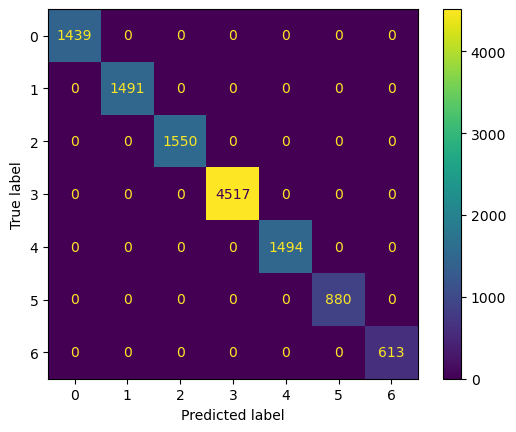

In [203]:
ConfusionMatrixDisplay(cm1).plot()

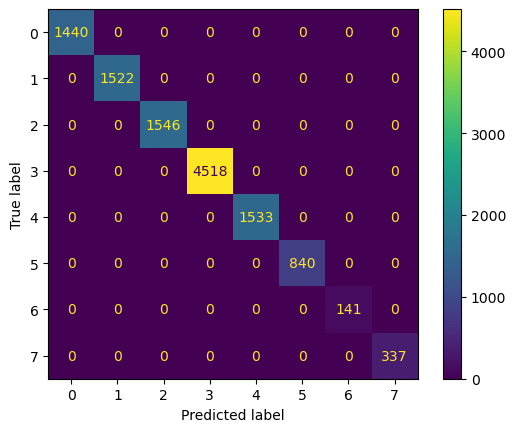

In [204]:
ConfusionMatrixDisplay(cm2).plot()

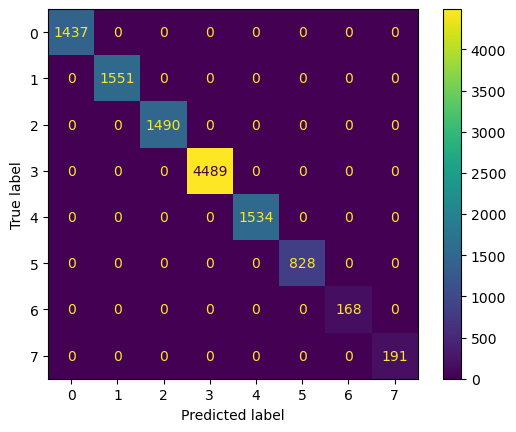

In [207]:
ConfusionMatrixDisplay(cm3).plot()

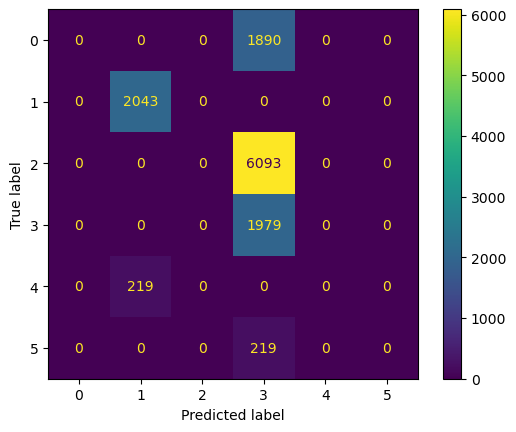

In [208]:
ConfusionMatrixDisplay(cm4).plot()

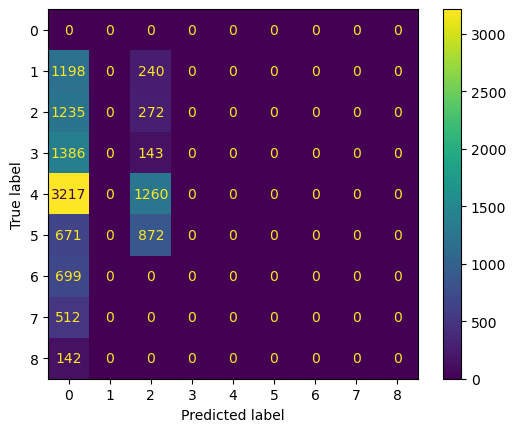

In [211]:
ConfusionMatrixDisplay(cm5).plot()

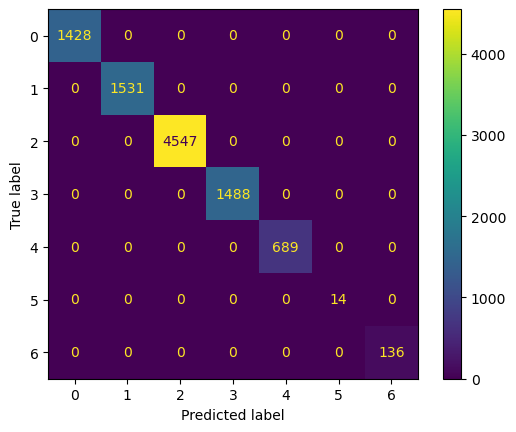

In [213]:
ConfusionMatrixDisplay(cm6).plot()

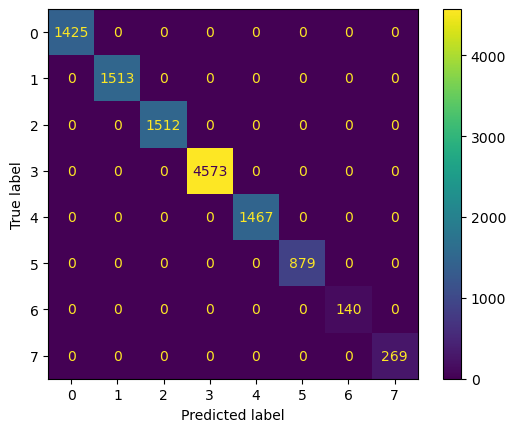

In [215]:
ConfusionMatrixDisplay(cm7).plot()

In [217]:
df

,date,time,fridge_temperature,temp_condition,label,type
0,2.0,12294.0,9.00,0.0,1,1.0
1,2.0,12294.0,9.25,0.0,1,1.0
2,2.0,12295.0,12.65,0.0,1,1.0
3,2.0,12295.0,4.65,3.0,1,1.0
4,2.0,12296.0,12.65,0.0,1,1.0
...,...,...,...,...,...,...
39939,4.0,3784.0,13.25,0.0,1,6.0
39940,4.0,3785.0,4.35,3.0,1,6.0
39941,4.0,3785.0,1.00,3.0,1,6.0
39942,4.0,3785.0,10.25,0.0,1,6.0


In [64]:
df.iloc[1000, :43]

date                6.0
time             5230.0
door_state          0.0
sphone_signal       0.0
label               1.0
type                0.0
Name: 1000, dtype: float64

In [50]:
df.iloc[2000, :43]

src_ip                       16.000000
src_port                  49387.000000
dst_ip                      210.000000
dst_port                   8080.000000
proto                         1.000000
service                       5.000000
duration                      0.000021
src_bytes                   130.000000
dst_bytes                  3440.000000
conn_state                    1.000000
missed_bytes                  1.000000
src_pkts                      1.000000
src_ip_bytes                 48.000000
dst_pkts                      1.000000
dst_ip_bytes                 40.000000
dns_query                   123.000000
dns_qclass                    1.000000
dns_qtype                     1.000000
dns_rcode                     3.000000
dns_AA                        0.000000
dns_RD                        1.000000
dns_RA                        0.000000
dns_rejected                  0.000000
ssl_version                   1.000000
ssl_cipher                    2.000000
ssl_resumed              

In [51]:
df.iloc[3000, :43]

src_ip                       16.000000
src_port                  49438.000000
dst_ip                      208.000000
dst_port                     80.000000
proto                         1.000000
service                       5.000000
duration                      0.000095
src_bytes                   130.000000
dst_bytes                  3440.000000
conn_state                    1.000000
missed_bytes                  1.000000
src_pkts                      1.000000
src_ip_bytes                 48.000000
dst_pkts                      1.000000
dst_ip_bytes                 40.000000
dns_query                   123.000000
dns_qclass                    1.000000
dns_qtype                     1.000000
dns_rcode                     3.000000
dns_AA                        0.000000
dns_RD                        1.000000
dns_RA                        0.000000
dns_rejected                  0.000000
ssl_version                   1.000000
ssl_cipher                    2.000000
ssl_resumed              

In [52]:
df.iloc[4000, :43]

src_ip                       16.000000
src_port                  49475.000000
dst_ip                      210.000000
dst_port                   8080.000000
proto                         1.000000
service                       5.000000
duration                      0.000116
src_bytes                   130.000000
dst_bytes                  3440.000000
conn_state                    1.000000
missed_bytes                  1.000000
src_pkts                      1.000000
src_ip_bytes                 48.000000
dst_pkts                      1.000000
dst_ip_bytes                 40.000000
dns_query                   123.000000
dns_qclass                    1.000000
dns_qtype                     1.000000
dns_rcode                     3.000000
dns_AA                        0.000000
dns_RD                        1.000000
dns_RA                        0.000000
dns_rejected                  0.000000
ssl_version                   1.000000
ssl_cipher                    2.000000
ssl_resumed              

In [53]:
df.iloc[5000, :43]

src_ip                       16.000000
src_port                  49514.000000
dst_ip                      208.000000
dst_port                     80.000000
proto                         1.000000
service                       5.000000
duration                      0.005098
src_bytes                   130.000000
dst_bytes                  3440.000000
conn_state                    1.000000
missed_bytes                  1.000000
src_pkts                      1.000000
src_ip_bytes                 48.000000
dst_pkts                      1.000000
dst_ip_bytes                 40.000000
dns_query                   123.000000
dns_qclass                    1.000000
dns_qtype                     1.000000
dns_rcode                     3.000000
dns_AA                        0.000000
dns_RD                        1.000000
dns_RA                        0.000000
dns_rejected                  0.000000
ssl_version                   1.000000
ssl_cipher                    2.000000
ssl_resumed              

In [55]:
df.iloc[6000, :43]

src_ip                       16.00000
src_port                  49552.00000
dst_ip                      210.00000
dst_port                   8080.00000
proto                         1.00000
service                       5.00000
duration                      0.00013
src_bytes                   130.00000
dst_bytes                  3440.00000
conn_state                    1.00000
missed_bytes                  1.00000
src_pkts                      1.00000
src_ip_bytes                 48.00000
dst_pkts                      1.00000
dst_ip_bytes                 40.00000
dns_query                   123.00000
dns_qclass                    1.00000
dns_qtype                     1.00000
dns_rcode                     3.00000
dns_AA                        0.00000
dns_RD                        1.00000
dns_RA                        0.00000
dns_rejected                  0.00000
ssl_version                   1.00000
ssl_cipher                    2.00000
ssl_resumed                   0.00000
ssl_establis

In [57]:
df.iloc[7000, :43]

src_ip                       16.000000
src_port                  49590.000000
dst_ip                      210.000000
dst_port                   8080.000000
proto                         1.000000
service                       5.000000
duration                      0.000078
src_bytes                   130.000000
dst_bytes                  3440.000000
conn_state                    1.000000
missed_bytes                  1.000000
src_pkts                      1.000000
src_ip_bytes                 48.000000
dst_pkts                      1.000000
dst_ip_bytes                 40.000000
dns_query                   123.000000
dns_qclass                    1.000000
dns_qtype                     1.000000
dns_rcode                     3.000000
dns_AA                        0.000000
dns_RD                        1.000000
dns_RA                        0.000000
dns_rejected                  0.000000
ssl_version                   1.000000
ssl_cipher                    2.000000
ssl_resumed              

In [58]:
df.iloc[8000, :43]

src_ip                       16.000000
src_port                  49638.000000
dst_ip                      208.000000
dst_port                     80.000000
proto                         1.000000
service                       5.000000
duration                      0.000111
src_bytes                   130.000000
dst_bytes                  3440.000000
conn_state                    1.000000
missed_bytes                  1.000000
src_pkts                      1.000000
src_ip_bytes                 48.000000
dst_pkts                      1.000000
dst_ip_bytes                 40.000000
dns_query                   123.000000
dns_qclass                    1.000000
dns_qtype                     1.000000
dns_rcode                     3.000000
dns_AA                        0.000000
dns_RD                        1.000000
dns_RA                        0.000000
dns_rejected                  0.000000
ssl_version                   1.000000
ssl_cipher                    2.000000
ssl_resumed              

In [100]:
# Define the feature names
feature_names = [
    "src_ip", "src_port", "dst_ip", "dst_port", "proto", "service", "duration", 
    "src_bytes", "dst_bytes", "conn_state", "missed_bytes", "src_pkts", 
    "src_ip_bytes", "dst_pkts", "dst_ip_bytes", "dns_query", "dns_qclass", 
    "dns_qtype", "dns_rcode", "dns_AA", "dns_RD", "dns_RA", "dns_rejected", 
    "ssl_version", "ssl_cipher", "ssl_resumed", "ssl_established", "ssl_subject", 
    "ssl_issuer", "http_trans_depth", "http_method", "http_uri", "http_version", 
    "http_request_body_len", "http_response_body_len", "http_status_code", 
    "http_user_agent", "http_orig_mime_types", "http_resp_mime_types", 
    "weird_name", "weird_addl", "weird_notice", "label"
]

class_labels = {
    0: "normal",
    1: "backdoor",
    2: "ddos",
    3: "dos",
    4: "injection",
    5: "password",
    6: "ransomware",
    7: "scanning",
    8: "xss",
    9: "mitm"
}

def detect_intrusion(*feature_values, label_value, model_choice="Random Forest"):
    # Ensure the length of feature_values matches feature_names (excluding label)
    if len(feature_values) != len(feature_names) - 1:
        return "Please fill in all the required feature values."

    # Convert the input values to floats and match them with feature names
    try:
        feature_values = [float(value) for value in feature_values]
        label_value = int(label_value)  # Label should be an integer
    except ValueError:
        return "Please enter valid numerical values for all fields, including the label."

    # Add the label to feature values
    feature_values.append(label_value)

    # Choose the model based on user selection
    if model_choice == "Random Forest":
        model = rf_model
    elif model_choice == "Decision Tree":
        model = dt_model
    elif model_choice == "Bagging Classifier":
        model = bagging_model
    elif model_choice == "AdaBoost Classifier":
        model = ada_model
    else:
        return "Invalid model choice!"

    # Predict the class (multi-class classification)
    prediction = model.predict([feature_values])
    predicted_class = prediction[0]  # Get the predicted class (an integer between 0-9)

    # Notify the user of the detected attack or normal traffic
    if predicted_class == 0:
        return "No Intrusion Detected"
    else:
        return f"Intrusion Detected: {class_labels.get(predicted_class, 'Unknown Attack')}"

# Create Gradio input fields for each feature (excluding label initially)
inputs = [gr.Textbox(label=feature_name) for feature_name in feature_names[: -1]]  # Exclude the last one (label) from inputs

# Add label input field
inputs.append(gr.Textbox(label="label"))

# Add model choice dropdown
inputs.append(gr.Dropdown(choices=["Random Forest", "Decision Tree", "Bagging Classifier", "AdaBoost Classifier"], label="Select Model"))

# Create the Gradio interface
iface = gr.Interface(
    fn=detect_intrusion, 
    inputs=inputs,  # Pass the list of inputs directly
    outputs="text", 
    title="Intrusion Detection System",
    description="Fill in the blank fields for the network traffic features, the label value (0-9), and choose the model to detect intrusions."
)

# Launch the interface with a public shareable link
iface.launch()

* Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


In [ ]:
src_ip : 16.0, 
src_port : 49321.0, 
dst_ip : 210.0, 
dst_port : 8080.0, 
proto : 1.0, 
service : 5.0, 
duration : 0.000514, 
src_bytes : 130.0, 
dst_bytes : 3440.0, 
conn_state : 1.0, 
missed_bytes : 1.0, 
src_pkts : 1.0, 
src_ip_bytes : 48.0, 
dst_pkts : 1.0, 
dst_ip_bytes : 40.0, 
dns_query : 123.0, 
dns_qclass : 1.0, 
dns_qtype : 1.0, 
dns_rcode : 3.0, 
dns_AA : 0.0, 
dns_RD : 1.0, 
dns_RA : 0.0, 
dns_rejected : 0.0, 
ssl_version : 1.0, 
ssl_cipher : 2.0, 
ssl_resumed : 0.0, 
ssl_established : 0.0, 
ssl_subject : 1.0, 
ssl_issuer : 1.0, 
http_trans_depth : 0.0, 
http_method : 0.0, 
http_uri : 83.0, 
http_version : 0.0, 
http_request_body_len : 300.0, 
http_response_body_len : 2.0, 
http_status_code : 200.0, 
http_user_agent : 9.0, 
http_orig_mime_types : 1.0, 
http_resp_mime_types : 3.0, 
weird_name : 0.0, 
weird_addl : 0.0, 
weird_notice : 1.0, 
label : 1.0